In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
tax = pd.read_excel('tax.xlsx')
tax = tax.rename(columns = {"Tax revenue (% of GDP)": "country"})
tax2 = tax.set_index("country")
tax_safta = tax2.loc[["India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]]
tax_not_safta = tax2.loc[["Philippines", "Malaysia", "Iran", "Jordan", "Myanmar"]]
tax_all = tax2.loc[["Philippines", "Malaysia", "Iran", "Jordan", "Myanmar", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]]
tax_all.insert(0, "SAFTA", 0)
df = tax.copy()
df = pd.melt(df,id_vars = ["country"], value_name="Tax").sort_values('variable').rename(columns = {"variable": "year"}).dropna()
df["year"] = df["year"].astype(int)
imp2 = pd.read_excel('import.xlsx')
imp3 = imp2.rename(columns = {"Imports of goods and services (% of GDP)": "country"})
imp3 = imp3.set_index("country")
imp4 = imp3.loc[["Philippines", "Malaysia", "Iran", "Jordan", "Myanmar", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]]
imp4 = imp4.reset_index()
df_imp = imp4.copy()
df_imp = pd.melt(df_imp,id_vars = ["country"], value_name="imp").sort_values('variable').rename(columns = {"variable": "year"}).dropna()
df_imp["year"] = df_imp["year"].astype(int)
df_safta2 = tax_safta.copy()
df_safta = df_safta2.reset_index()
df_safta = pd.melt(df_safta,id_vars = ["country"], value_name="Tax").sort_values('variable').rename(columns = {"variable": "year"}).dropna()
df_safta["year"] = df_safta["year"].astype(int)
df_not_safta2 = tax_not_safta.copy()
df_not_safta = df_not_safta2.reset_index()
df_not_safta = pd.melt(df_not_safta,id_vars = ["country"], value_name="Tax").sort_values('variable').rename(columns = {"variable": "year"}).dropna()
df_not_safta["year"] = df_not_safta["year"].astype(int)

## Relação entre a participação no Acordo de livre comércio do sul da Ásia (SAFTA) e arrecadação de impostos.

### Hipótese: Países que entraram no SAFTA em 2004 apresentaram queda na arrecadação de impostos (% do PIB).

### Mecanismo: O Acordo de livre comércio do sul da Ásia (https://commerce.gov.in/writereaddata/trade/safta.pdf) criou uma zona de livre comércio entre seus países membros, eliminando barreiras alfandegárias entre eles, como impostos e tarifas de importação. Com o fim desses impostos e tarifas de importação, é plausível que a arrecadação de impostos dos países membros tenha diminuído após a entrada na SAFTA. Essa hipótese baseia-se na tese de doutorado "The effect of trade liberalization on taxation and government revenue" por Suparerk Pupongsak (https://etheses.bham.ac.uk/id/eprint/837/1/Pupongsak10PhD.pdf), na qual ele afirma que: 
#### "The fear of the impact of trade liberalization seems to be substantial in low income countries because the percentage of trade tax in total tax revenues is as high as 26 percent on average. Because of such a high dependence on trade tax for revenue, any country which has that tax structure and commits itself to any form of trade liberalization must be concerned about how to mitigate the revenue loss, a serious problem that trade liberalization potentially entails."(pg. 130)


#### Os datasets utilizados no presente trabalho foram obtidos no site Gapminder.com, e podem ser diretamente acessados nos seguintes links:

#### Tax Revenue(% of GDP): https://data.worldbank.org/indicator/GC.TAX.TOTL.GD.ZS
#### Imports (% of GDP): https://data.worldbank.org/indicator/NE.IMP.GNFS.ZS



## Análise dos dados:
### Em primeiro lugar, foi criado um dataset da arrecadação de impostos (% do PIB) de 10 países da região sul asiática e seus redores, sendo que 5 desses países são membros da SAFTA (India, Maldivas, Nepal, Paquistão e Sri Lanka), e os outros 5 (Filipinas, Irã, Jordania, Myanmar e Malásia) não são.

In [3]:
tax_all
paises = ["India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
for i in tax_all.index.tolist(): 
    tax_all.SAFTA[i] = int(i in paises)
tax_all.sort_values("country")

C:\Users\crazy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,SAFTA,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
country,,,,,,,,,,,,,,,,,,,,,
India,1,10.107369,10.287921,9.917339,8.635663,9.086166,9.333427,9.339940,9.116215,8.210889,...,8.810781,9.233430,9.405871,9.916140,11.028136,11.895875,10.840102,9.663310,9.478979,NaN
Iran,0,5.993785,6.658888,7.440989,4.095074,4.678152,6.603632,8.652779,10.989559,9.285579,...,5.518011,5.897925,6.048875,7.851609,7.428923,7.262472,7.556702,9.256529,NaN,NaN
Jordan,0,18.632837,18.596897,22.972247,20.918561,19.987421,20.709074,21.686583,19.049922,18.119232,...,17.478000,18.213653,20.996084,24.415812,23.631264,23.779628,17.122557,16.165082,15.290352,NaN
Malaysia,0,NaN,NaN,NaN,NaN,NaN,NaN,19.377850,19.753367,16.730158,...,17.446955,15.495655,15.199094,15.426121,15.080807,14.822605,15.205630,15.663841,14.297684,NaN
Maldives,1,13.962319,14.614095,14.958982,13.734537,13.004582,13.596388,13.452179,14.445504,14.200240,...,10.471641,10.633465,12.154305,13.740409,14.441770,15.024540,14.696536,11.903512,NaN,NaN
Myanmar,0,6.197784,5.610206,5.037397,4.728010,4.251713,3.744487,3.959317,4.415239,3.519310,...,2.001047,2.210412,3.272456,3.881778,NaN,NaN,NaN,NaN,NaN,NaN
Nepal,1,6.996693,6.620302,6.483344,6.654637,7.729134,8.985514,8.719914,8.723660,8.639333,...,8.560583,8.651812,8.974959,9.179453,8.779758,9.772473,10.440086,11.846662,13.336465,NaN
Pakistan,1,13.319111,12.226622,12.993983,12.826087,12.752001,13.248625,13.815476,12.742473,12.829094,...,10.311311,10.783838,10.284545,9.604414,9.427413,9.838226,9.859638,9.277453,9.995905,NaN
Philippines,0,14.082324,14.605240,15.441797,15.610493,16.025747,16.291972,16.938638,16.984287,14.108317,...,11.823039,12.103291,11.814621,12.427811,13.711296,13.535104,13.588812,12.230420,12.146892,NaN


### Os países pertencentes ao SAFTA, cuja hipótese será analisada, se encontram no dataframe abaixo:

In [4]:
tax_safta

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
country,,,,,,,,,,,,,,,,,,,,,
India,10.107369,10.287921,9.917339,8.635663,9.086166,9.333427,9.339940,9.116215,8.210889,8.798613,...,8.810781,9.233430,9.405871,9.916140,11.028136,11.895875,10.840102,9.663310,9.478979,NaN
Maldives,13.962319,14.614095,14.958982,13.734537,13.004582,13.596388,13.452179,14.445504,14.200240,14.091570,...,10.471641,10.633465,12.154305,13.740409,14.441770,15.024540,14.696536,11.903512,NaN,NaN
Nepal,6.996693,6.620302,6.483344,6.654637,7.729134,8.985514,8.719914,8.723660,8.639333,8.422505,...,8.560583,8.651812,8.974959,9.179453,8.779758,9.772473,10.440086,11.846662,13.336465,NaN
Pakistan,13.319111,12.226622,12.993983,12.826087,12.752001,13.248625,13.815476,12.742473,12.829094,13.165320,...,10.311311,10.783838,10.284545,9.604414,9.427413,9.838226,9.859638,9.277453,9.995905,NaN
Sri Lanka,19.020834,18.304798,17.953457,17.469999,17.167976,17.752017,16.950691,16.007674,14.476427,15.012062,...,13.556295,12.710676,13.465969,13.732529,14.577259,14.221609,13.277331,NaN,NaN,NaN


### Os outros 5 países não fazem parte do SAFTA, porém possuem características geográficas e sociais semelhantes aos participantes, e por isso serão utilizados como grupo de controle.

In [5]:
tax_not_safta

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
country,,,,,,,,,,,,,,,,,,,,,
Philippines,14.082324,14.605240,15.441797,15.610493,16.025747,16.291972,16.938638,16.984287,14.108317,13.306404,...,11.823039,12.103291,11.814621,12.427811,13.711296,13.535104,13.588812,12.230420,12.146892,NaN
Malaysia,NaN,NaN,NaN,NaN,NaN,NaN,19.377850,19.753367,16.730158,14.093708,...,17.446955,15.495655,15.199094,15.426121,15.080807,14.822605,15.205630,15.663841,14.297684,NaN
Iran,5.993785,6.658888,7.440989,4.095074,4.678152,6.603632,8.652779,10.989559,9.285579,9.059293,...,5.518011,5.897925,6.048875,7.851609,7.428923,7.262472,7.556702,9.256529,NaN,NaN
Jordan,18.632837,18.596897,22.972247,20.918561,19.987421,20.709074,21.686583,19.049922,18.119232,18.105206,...,17.478000,18.213653,20.996084,24.415812,23.631264,23.779628,17.122557,16.165082,15.290352,NaN
Myanmar,6.197784,5.610206,5.037397,4.728010,4.251713,3.744487,3.959317,4.415239,3.519310,2.752748,...,2.001047,2.210412,3.272456,3.881778,NaN,NaN,NaN,NaN,NaN,NaN


### A primeira análise foi feita através de uma série temporal da arrecadação de impostos (% do PIB) dos países pertencentes ao SAFTA, antes e depois de sua criação em 2004, marcado pela linha azul vertical pontilhada.

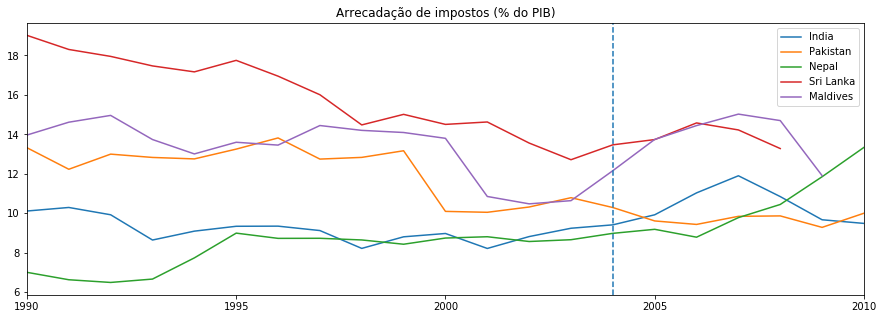

In [6]:
plt.figure(figsize=(15,5))
safta = ["India", "Pakistan", "Nepal", "Sri Lanka", "Maldives"]
for i in safta:
    plt.plot(df[df.country == i].year, df[df.country == i].Tax, label = i)
plt.legend(loc="upper right")
plt.axvline(x=2004, ls='--')
plt.xlim(1990, 2010)
plt.locator_params(integer=True)
plt.title("Arrecadação de impostos (% do PIB)")
plt.show()

### A série temporal mostra que  os países pertencentes ao SAFTA  não tiveram um comportamento crescente em relação à arrecadação de impostos, não confirmando a hipótese inicial de que sua criação diminuiria a arrecadação dos países participantes.

### O gráfico em barras seguinte mostra a variação da arrecadação dos países membros do SAFTA após o ano de 2004, e confirma o observado no gráfico anterior de que todos países não tiveram um comportamento crescente.

In [7]:
mean_before = df_safta[df_safta['year'] < 2004].groupby("country").mean()['Tax'].reset_index().rename(columns={"Tax":"tax_before"})
mean_after = df_safta[df_safta['year'] > 2004].groupby("country").mean()['Tax'].reset_index().rename(columns={"Tax":"tax_after"})
mean_before["country"] = mean_before["country"].astype(str)
mean_after["country"] = mean_after["country"].astype(str)

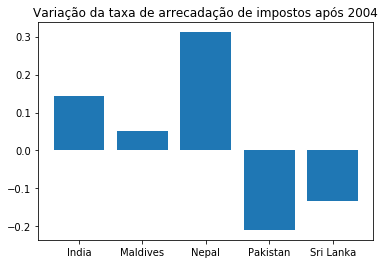

In [8]:
country_means = mean_before.merge(mean_after, how="outer")
country_means['relative_diff'] = country_means.apply(lambda row: (row['tax_after'] - row['tax_before']) / row['tax_before'], axis=1)
plt.bar(country_means['country'], country_means['relative_diff'])
plt.title("Variação da taxa de arrecadação de impostos após 2004")
plt.show()

### O gráfico seguinte mostra que os países de controle também apresentaram comportamento não conclusivo em relação a arrecadação de impostos após a criação do SAFTA.

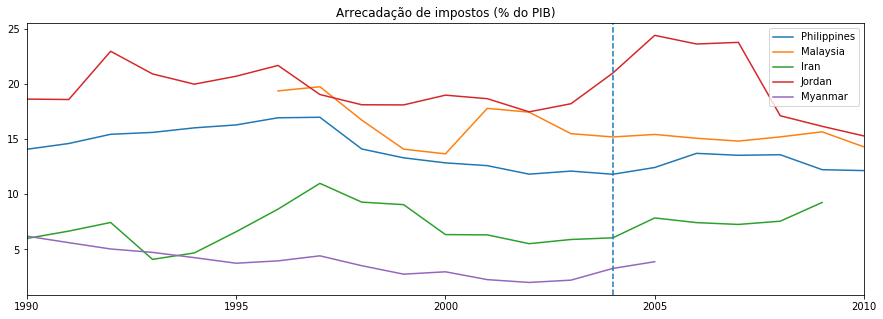

In [9]:
plt.figure(figsize=(15,5))
not_safta = ["Philippines", "Malaysia", "Iran", "Jordan", "Myanmar"]
for i in not_safta:
    plt.plot(df[df.country == i].year, df[df.country == i].Tax, label = i)
plt.axvline(x=2004, ls='--')
plt.legend(loc="upper right")
plt.xlim(1990, 2010)
plt.locator_params(integer=True)
plt.title("Arrecadação de impostos (% do PIB)")
plt.show()

### Novamente, o gráfico em barras mostra o observado anteriormente.

In [10]:
mean_before_not = df_not_safta[df_not_safta['year'] < 2004].groupby("country").mean()['Tax'].reset_index().rename(columns={"Tax":"tax_before"})
mean_after_not = df_not_safta[df_not_safta['year'] > 2004].groupby("country").mean()['Tax'].reset_index().rename(columns={"Tax":"tax_after"})
mean_before_not["country"] = mean_before_not["country"].astype(str)
mean_after_not["country"] = mean_after_not["country"].astype(str)

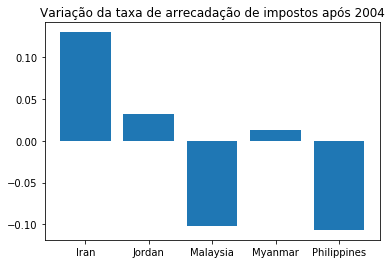

In [11]:
country_means_not = mean_before_not.merge(mean_after_not, how="outer")
country_means_not['relative_diff'] = country_means_not.apply(lambda row: (row['tax_after'] - row['tax_before']) / row['tax_before'], axis=1)
plt.bar(country_means_not['country'], country_means_not['relative_diff'])
plt.title("Variação da taxa de arrecadação de impostos após 2004")
plt.show()

### Em sequência, foram analisadas as médias das arrecadações de impostos dos países membros do SAFTA e dos países não membros. O gráfico mostra que em ambos os casos as médias subiram após a criação do SAFTA, não confirmando a hipótese inicial. Além disso, em ambos os casos as médias de arrecadação começaram a crescer no ano de 2003, um ano antes da criação do SAFTA.

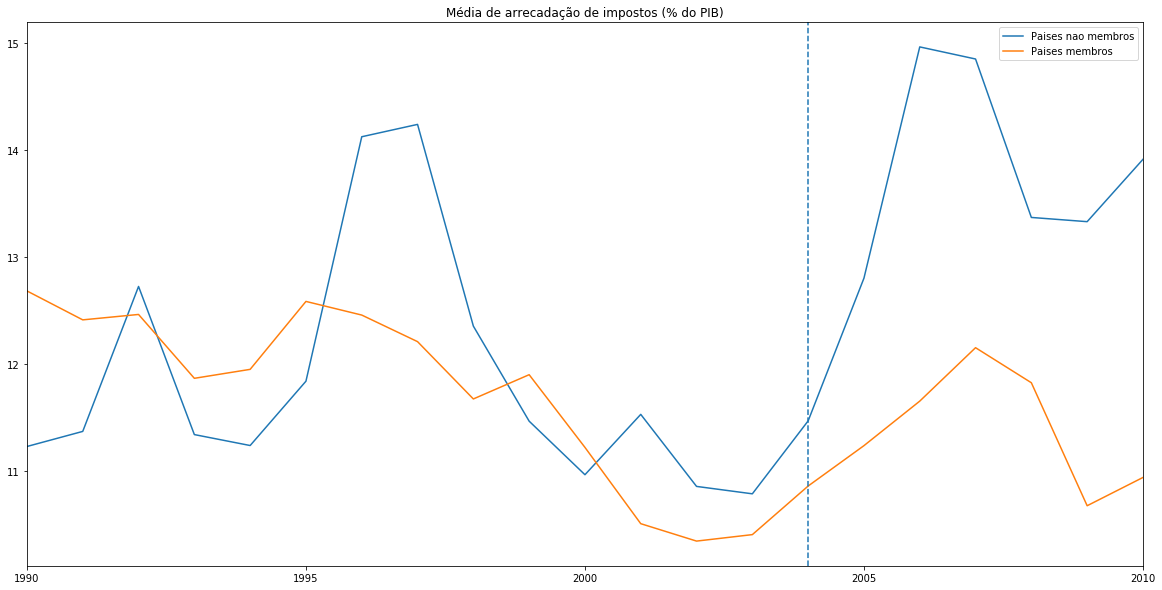

In [12]:
anos = list(range(1990, 2011))
media_safta = []
media_not_safta = []
for i in anos:
    media_safta.append(df_safta[df_safta.year == i].Tax.mean())
for i in anos:
    media_not_safta.append(df_not_safta[df_not_safta.year == i].Tax.mean())
plt.figure(figsize=(20,10))
plt.plot(anos, media_not_safta, label = "Paises nao membros")
plt.plot(anos, media_safta, label  = "Paises membros")
plt.legend(loc="upper right")
plt.axvline(x=2004, ls='--')
plt.xlim(1990, 2010)
plt.locator_params(integer=True)
plt.title("Média de arrecadação de impostos (% do PIB)")
plt.show()

### Como se trata de uma organização de livre comércio, foi analisado também se as taxas de importação (% do PIB) poderiam ter interferido na taxa de arrecadação de impostos. A série temporal abaixo mostra que as taxas de importação não tiveram um comportamento conclusivo após a criação do SAFTA.

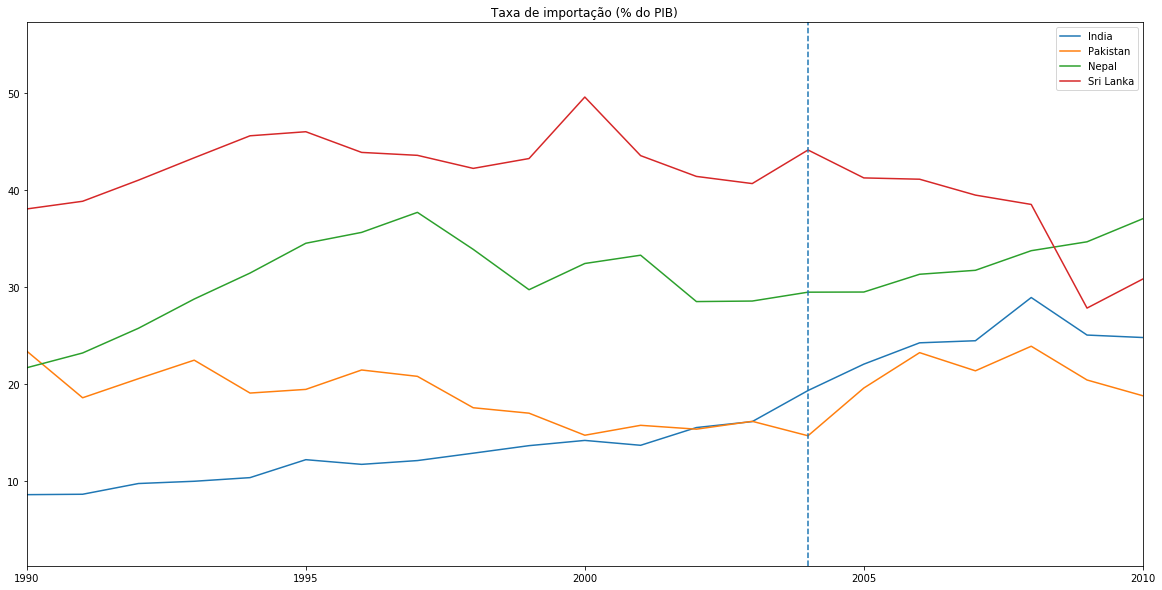

In [13]:
plt.figure(figsize=(20,10))
safta = ["India", "Pakistan", "Nepal", "Sri Lanka"]
for i in safta:
    plt.plot(df_imp[df_imp.country == i].year, df_imp[df_imp.country == i].imp, label = i )
plt.legend(loc="upper right")
plt.axvline(x=2004, ls='--')
plt.xlim(1990, 2010)
plt.locator_params(integer=True)
plt.title("Taxa de importação (% do PIB)")
plt.show()

### Além disso, tanto o gráfico scatter quanto a matriz de correlação mostram que não há correlação entre a média da taxa de importação(% do PIB) e a média da taxa de arrecadação de impostos(% do PIB) dos países membros.

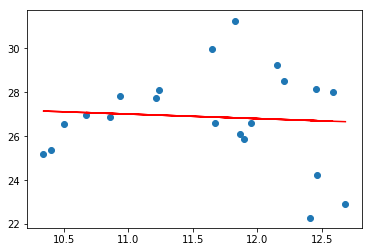

In [14]:
from numpy.polynomial.polynomial import polyfit

media_imp_safta = list(df_imp[(df_imp["country"].isin(safta)) & (df_imp["year"] >= 1990)].groupby("year").mean()["imp"])
plt.scatter(media_safta, media_imp_safta)
b, m = polyfit(media_safta, media_imp_safta, 1)
plt.plot(media_safta, b + m * np.array(media_safta), '-', color="red")
plt.show()

In [15]:
np.corrcoef(media_safta, media_imp_safta)

array([[ 1.        , -0.07255596],
       [-0.07255596,  1.        ]])

### Voltando à análisa da literatura, em específico a tese de doutourado "The effect of trade liberalization on taxation and government revenue", é possível compreender a dificuldade de confirmar ou negar a hipótese inicial:



#### "In conclusion, it is very difficult to determine precisely the effect of trade liberalization on international trade tax revenue since trade liberalization may either decrease or even increase trade tax revenue, depending on the form, the level of liberalization and countries’ environmental liberalization conditions. The net impact of trade liberalization on trade tax is an empirical matter. Trade tax revenue may also be affected by other important variables such as the level of economic development, the exchange rate, the macroeconomic environment, and the effectiveness of tax and customs administrations."(pgs. 146-147)

### Mesmo que fossem analisados outros dados disponíveis no site Gapminder.org, seria muito improvável chegar em uma conclusão a respeito da hipótese inicial, uma vez que, como explicado no artigo acima, os efeitos do livre comércio e da arrecadação de impostos envolvem inúmeros aspectos econômicos, políticos e sociais.

## Conclusão:

### Os dados analisados não permitem afirmar que a criação do SAFTA resultou na diminuição da arrecadação de impostos dos seus países membros.
### Para que se possa chegar em conclusões que possivelmente confirmem ou neguem a hipótese inicial, seria necessário a análise de uma série de outros dados não disponíveis na fonte de consulta (Gapminder.org), como desenvolvimento econômico, taxa de câmbio, cenário macroeconômico, efetividade administrativa, entre outros.



